In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
!pip install ftfy regex tqdm

In [ ]:
!pip install git+https://github.com/openai/CLIP.git

In [2]:
data_dir = '/kaggle/input/cassava-leaf-disease-classification'
train_data = os.path.join(data_dir, 'train.csv')

In [3]:
train_folder = os.path.join(data_dir, 'train_images')
test_folder = os.path.join(data_dir, 'test_images')

In [4]:
train_df = pd.read_csv(train_data)
train_df.head(10)

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
5,1000837476.jpg,3
6,1000910826.jpg,2
7,1001320321.jpg,0
8,1001723730.jpg,4
9,1001742395.jpg,3


In [5]:
train_df['label'].value_counts()

label
3    13158
4     2577
2     2386
1     2189
0     1087
Name: count, dtype: int64

In [ ]:
train_df.iloc[2, 0]

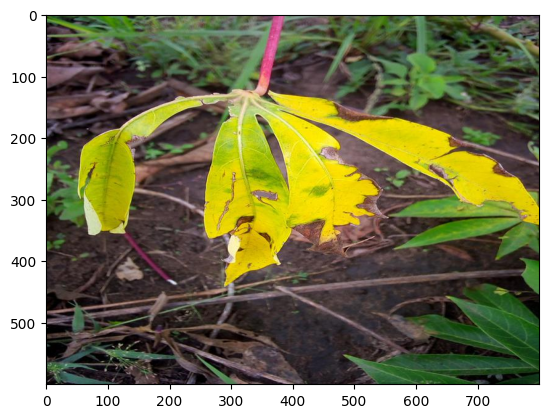

In [6]:
img1 = Image.open(os.path.join(train_folder, train_df.iloc[8, 0]))
plt.imshow(img1)

In [7]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(img1).unsqueeze(0).to(device)
#text = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)

image_features

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 63.2MiB/s]


tensor([[ 6.5929e-02,  3.4184e-02, -5.8915e-02,  4.6605e-01, -1.2720e-01,
          3.4908e-03,  4.7604e-01,  1.6535e-01,  1.8803e-02, -1.7458e-01,
         -2.1076e-02,  4.2387e-01, -5.7157e-01,  8.1914e-02,  3.1840e-01,
         -4.9651e-01,  4.0321e-01, -2.6452e-01,  3.2180e-01, -4.5696e-01,
         -4.2790e-01,  2.6444e-01,  7.9359e-02,  1.2365e-01, -2.7797e-01,
         -3.1174e-01,  5.4558e-02,  2.6095e-01, -1.0229e-01, -5.0921e-01,
          4.3774e-01,  2.4211e-01, -2.0076e-01, -3.0770e-01,  6.6157e-01,
         -2.1215e-01,  1.2147e-02, -4.3112e-02,  1.5439e-01,  7.8604e-01,
          1.2619e-01, -2.0412e-01,  1.3114e-01,  3.6222e-02,  2.6517e-01,
         -1.7427e+00,  2.0995e-01,  5.4119e-01,  6.7826e-03,  3.4583e-01,
         -4.0932e-01, -7.1852e-02, -1.6937e-01, -1.3331e-01, -1.2824e-01,
          1.5113e-01,  3.8902e-02, -1.9799e-02,  4.4220e-02,  2.6544e-01,
          8.2913e-01, -1.2707e-01, -4.1803e-01,  1.4235e-01, -1.6133e-01,
         -3.3842e-01,  6.6038e-02,  6.